In [22]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.cluster import k_means
import seaborn as sns

In [3]:
data= pd.read_csv('/kaggle/input/mall-customers/Mall_Customers.csv')

In [4]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [20]:
data.groupby('Genre')['Genre'].count()

Genre
Female    112
Male       88
Name: Genre, dtype: int64

<Axes: xlabel='Genre', ylabel='count'>

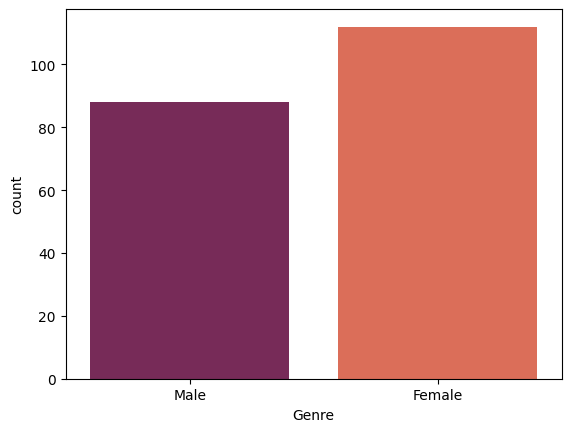

In [25]:
sns.countplot(data=data,x='Genre',palette='rocket')

In [26]:
data.Age.max()

70

In [27]:
data.Age.min()

18

In [49]:
def define_interval(age):
    if age >= 18 and age<30:
        return '18-30'
    elif age <= 50:
        return '30-50'
    else :
        return '+50'

In [50]:
data['age_interval'] = data['Age'].apply(define_interval)

<Axes: xlabel='age_interval', ylabel='count'>

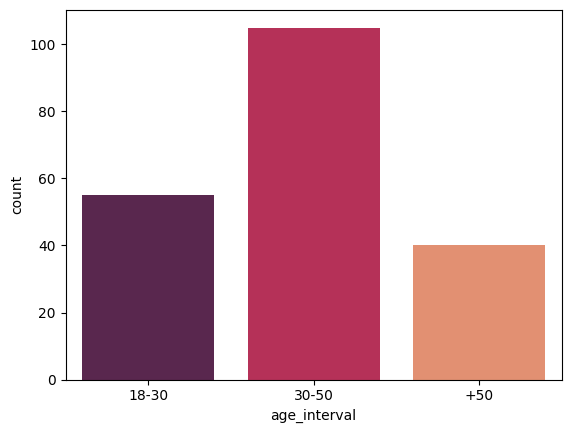

In [52]:
sns.countplot(data=data,x='age_interval',palette='rocket')